In [1]:
import pandas as pd
import numpy as np
import gpelletier.stats.fonctions_univariees as gpfu
import gpelletier.stats.fonctions_bivariees as gpfb

#On ne prend pas en compte ENERGYSTARScore
data2015 = pd.read_csv('data2015_noEss.csv', sep=',')
data2015 = data2015.drop(columns='Unnamed: 0')

In [ ]:
#------------------------------#
#------------------------------#

In [ ]:
#Analyse pour la cible GHGEmissions(MetricTonsCO2e):

In [2]:
#Correlation lineaire entre la cible GHGEmissions(MetricTonsCO2e) et les features quantitatives
gpfb.corr_tab_quanti_quanti(data2015.select_dtypes(exclude='object'), 'GHGEmissions(MetricTonsCO2e)', 0, 1)

corr (abs) >=  0
pourcentage valeurs manquantes par colonne <  100 %



,GHGEmissions(MetricTonsCO2e) corr with:,corr,p-value
17,SiteEnergyUse(kBtu),0.887696,0.000000e+00
5,LargestPropertyUseTypeGFA,0.581405,5.074198e-149
7,PropertyGFABuilding(s),0.546623,1.679981e-128
9,PropertyGFATotal,0.510319,1.647131e-109
12,SecondLargestPropertyUseTypeGFA,0.400327,3.363300e-64
8,PropertyGFAParking,0.142875,6.129596e-09
6,OSEBuildingID,-0.112200,5.211755e-06
13,ThirdLargestPropertyUseTypeGFA,0.082469,8.260530e-04
4,ENERGYSTARScore,-0.057472,1.989716e-02
10,SPD Beats,-0.049918,4.319140e-02


In [ ]:
#On s'impose un seuil de correlation lineaire de 0.1 (i.e. on retient les features avec une correlation lienaire absolue > 0.1)
#On fait attention que ces features ne soient pas trop correlees (ex : correlation > 0.9)
#Les features qu'on peut retenir sont:
#LargestPropertyUseTypeGFA, PropertyGFABuilding(s), PropertyGFATotal, SecondLargestPropertyUseTypeGFA, PropertyGFAParking, OSEBuildingID

In [ ]:
#------------------------------#

In [3]:
#OSEBuildingID : 
len(data2015['OSEBuildingID']) - len(data2015['OSEBuildingID'].unique())

0

In [ ]:
#OSEBuildingID est un ID unique pour chaque donnee renseignee.
#Cette feature n'ait pas pertinente pour notre probleme.
#On la retire de notre liste de features a utiliser pour notre modele.

In [ ]:
#------------------------------#

In [3]:
#On discretise CouncilDistrictCode:
bins = [0, 1, 2, 3, 4, 5, 6, 7]
data2015['CouncilDistrictCode'] = pd.cut(data2015['CouncilDistrictCode'], bins)

In [ ]:
#------------------------------#

In [4]:
#Correlation (eta carre) entre la cible SiteEnergyUse(kBtu) et les features quanlitatives
gpfb.corr_tab_quanti_quali(pd.concat([data2015.select_dtypes(include=['object', 'category']), data2015['GHGEmissions(MetricTonsCO2e)']], axis=1), 'GHGEmissions(MetricTonsCO2e)', 0, 1)

Seuil (abs) = 0
GHGEmissions(MetricTonsCO2e) corr with:


,Feature,eta_squared
11,PropertyName,1.00
13,TaxParcelIdentificationNumber,0.92
5,ListOfAllPropertyUseTypes,0.56
4,LargestPropertyUseType,0.45
10,PrimaryPropertyType,0.43
6,Neighborhood,0.03
14,ThirdLargestPropertyUseType,0.03
0,BuildingType,0.02
7,NumberofBuildings,0.02
12,SecondLargestPropertyUseType,0.01


In [ ]:
#On s'impose un seuil de correlation (eta carre) de 0.1 (i.e. on retient les features avec une correlation absolue > 0.1)
#On fait attention que ces features ne soient pas trop correlees (ex : correlation > 0.9)
#Les features qu'on peut retenir sont:
#ListOfAllPropertyUseTypes, LargestPropertyUseType, PrimaryPropertyType

In [ ]:
#------------------------------#
#------------------------------#

In [5]:
#Correlation entre les features:
features = data2015[['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'PrimaryPropertyType', 'LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFATotal', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFAParking']]

In [ ]:
#------------------------------#

In [ ]:
#Pour les memes raisons que vu precedemment (fichier features_pertinentes_SiteEnergyUse.ipynb),
#on supprime les features PropertyGFATotal et PropertyGFABuilding(s) (on garde LargestPropertyUseTypeGFA),
#ainsi que PrimaryPropertyType (on garde LargestPropertyUseType).

In [ ]:
#Pour la prediction de GHGEmissions(MetricTonsCO2e), on utilise les features suivantes:
#'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' et 'PropertyGFAParking'

In [2]:
features = data2015[['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFAParking']]

In [ ]:
#------------------------------#
#------------------------------#

In [ ]:
#Analyse univariee de la cible GHGEmissions(MetricTonsCO2e):

In [7]:
data2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     1641.000000
mean       169.199147
std        567.117812
min          0.080000
25%         19.350000
50%         48.600000
75%        138.280000
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [8]:
#On passe au log:
np.log(data2015['GHGEmissions(MetricTonsCO2e)'] + 1).describe()

count    1641.000000
mean        3.967982
std         1.444814
min         0.076961
25%         3.013081
50%         3.903991
75%         4.936486
max         9.378046
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

[array([0.07696104, 0.11332869, 7.95404567, 8.99314162, 8.46092544,
        9.28559997, 7.98576682, 8.305615  , 9.37804647, 8.08123692,
        8.02146306, 8.10832831, 8.48277978, 8.26745153])]

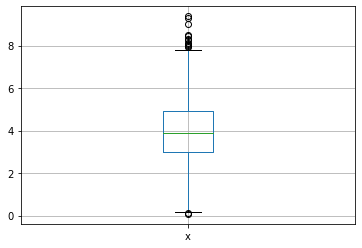

In [5]:
#Boxplot apres passage au log:
gpfu.liste_fliers_colonne(data2015, 'GHGEmissions(MetricTonsCO2e)')

mean:    3.968
median:  3.904
var:     2.086
ect:     1.444

Skewness de la colonne [GHGEmissions(MetricTonsCO2e)]:
La distribution est etalee a droite.
skewness: 0.180

Kurtosis de la colonne [GHGEmissions(MetricTonsCO2e)]:
Les observations sont plus concentrées : la distribution est moins aplatie.
kurtosis: 0.180



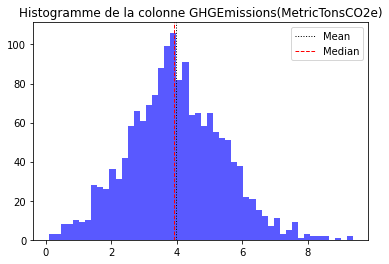

In [4]:
data2015['GHGEmissions(MetricTonsCO2e)'] = np.log(data2015['GHGEmissions(MetricTonsCO2e)'] + 1)
gpfu.show_hist_colonne(data2015, 'GHGEmissions(MetricTonsCO2e)')

In [ ]:
#La distribution de log(GHGEmissions(MetricTonsCO2e) + 1) peut etre consideree comme une distribution normale.

In [ ]:
#------------------------------#

In [ ]:
#Analyse univariee des features :
#Ces analyses ont deja ete effectuees dans le fichier features_pertinentes_SiteEnergyUse.ipynb